In [12]:
# run this to shorten the data import from the files
import os
cwd = os.path.dirname(os.getcwd())+'/'
path_data = os.path.join(os.path.dirname(os.getcwd()), 'datasets/')


In [13]:
import pandas as pd

co2_levels = pd.read_csv(path_data+'ch3_co2_levels.csv', parse_dates=['datestamp'], index_col='datestamp')
co2_levels.head()

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


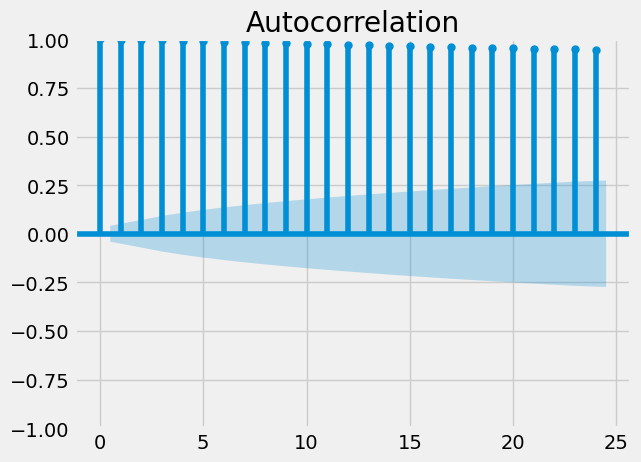

"\nCongratulations! Autocorrelation plots can be used to quickly discover patterns into your time series, so let's delve a little bit deeper into that!\n"

In [14]:
# exercise 01

"""
Autocorrelation in time series data

In the field of time series analysis, autocorrelation refers to the correlation of a time series with a lagged version of itself. For example, an autocorrelation of order 3 returns the correlation between a time series and its own values lagged by 3 time points.

It is common to use the autocorrelation (ACF) plot, also known as self-autocorrelation, to visualize the autocorrelation of a time-series. The plot_acf() function in the statsmodels library can be used to measure and plot the autocorrelation of a time series.
"""

# Instructions

"""

    Import tsaplots from statsmodels.graphics.
    Use the plot_acf() function from tsaplots to plot the autocorrelation of the 'co2' column in co2_levels.
    Specify a maximum lag of 24.

"""

# solution

# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the autocorrelation plot of your time series
fig = tsaplots.plot_acf(co2_levels['co2'].values, lags=24)

# Show plot
plt.show()

#----------------------------------#

# Conclusion

"""
Congratulations! Autocorrelation plots can be used to quickly discover patterns into your time series, so let's delve a little bit deeper into that!
"""

# Interpret autocorrelation plots

If autocorrelation values are close to 0, then values between consecutive observations are not correlated with one another. Inversely, autocorrelations values close to 1 or -1 indicate that there exists strong positive or negative correlations between consecutive observations, respectively.

In order to help you asses how trustworthy these autocorrelation values are, the plot_acf() function also returns confidence intervals (represented as blue shaded regions). If an autocorrelation value goes beyond the confidence interval region, you can assume that the observed autocorrelation value is statistically significant.

In the autocorrelation plot below, are consecutive observations highly correlated (i.e superior to 0.5) and statistically significant?

![image](/home/nero/Documents/Estudos/DataCamp/Python/courses/visualizing-time-series-data-in-python/ch3_acf.png)

### Possible Answers


    They are highly correlated but not statistically significant.
    
    
    They are not highly correlated but statistically significant.
    
    
    They are highly correlated and statistically significant. {Answer}
    
    
    They are neither highly correlated nor statistically significant.

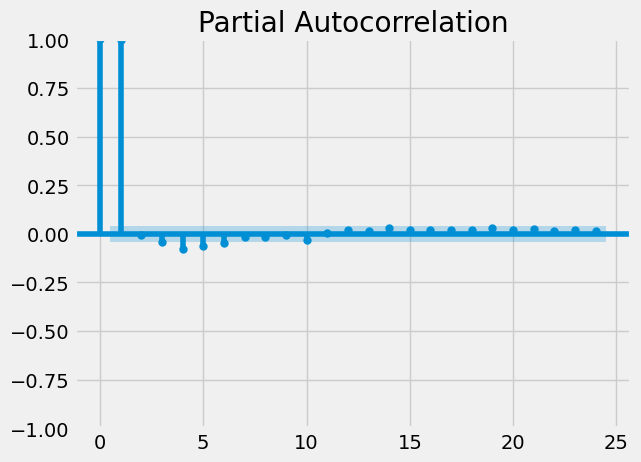

"\nGreat! Just like autocorrelation, partial autocorrelation plots can be tricky to interpret, so let's test your understanding of those!\n"

In [15]:
# exercise 02

"""
Partial autocorrelation in time series data

Like autocorrelation, the partial autocorrelation function (PACF) measures the correlation coefficient between a time-series and lagged versions of itself. However, it extends upon this idea by also removing the effect of previous time points. For example, a partial autocorrelation function of order 3 returns the correlation between our time series (t_1, t_2, t_3, …) and its own values lagged by 3 time points (t_4, t_5, t_6, …), but only after removing all effects attributable to lags 1 and 2.

The plot_pacf() function in the statsmodels library can be used to measure and plot the partial autocorrelation of a time series.
"""

# Instructions

"""

    Import tsaplots from statsmodels.graphics.
    Use the plot_pacf() function from tsaplots to plot the partial autocorrelation of the 'co2' column in co2_levels.
    Specify a maximum lag of 24.

"""

# solution

# Import required libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from statsmodels.graphics import tsaplots

# Display the partial autocorrelation plot of your time series
fig = tsaplots.plot_pacf(co2_levels['co2'], lags=24)

# Show plot
plt.show()

#----------------------------------#

# Conclusion

"""
Great! Just like autocorrelation, partial autocorrelation plots can be tricky to interpret, so let's test your understanding of those!
"""

# Interpret partial autocorrelation plots

If partial autocorrelation values are close to 0, then values between observations and lagged observations are not correlated with one another. Inversely, partial autocorrelations with values close to 1 or -1 indicate that there exists strong positive or negative correlations between the lagged observations of the time series.

The .plot_pacf() function also returns confidence intervals, which are represented as blue shaded regions. If partial autocorrelation values are beyond this confidence interval regions, then you can assume that the observed partial autocorrelation values are statistically significant.

In the partial autocorrelation plot below, at which lag values do we have statistically significant partial autocorrelations?

![image](/home/nero/Documents/Estudos/DataCamp/Python/courses/visualizing-time-series-data-in-python/ch3_pacf.png)

### Possible Answers


    0 and 1
    
    
    0, 1 and 10
    
    
    0, 1 and 2
    
    
    0, 1, 4, 5 and 6 {Answer}

In [25]:
# exercise 03

"""
Time series decomposition

When visualizing time series data, you should look out for some distinguishable patterns:

    seasonality: does the data display a clear periodic pattern?
    trend: does the data follow a consistent upwards or downward slope?
    noise: are there any outlier points or missing values that are not consistent with the rest of the data?

You can rely on a method known as time-series decomposition to automatically extract and quantify the structure of time-series data. The statsmodels library provides the seasonal_decompose() function to perform time series decomposition out of the box.

decomposition = sm.tsa.seasonal_decompose(time_series)

You can extract a specific component, for example seasonality, by accessing the seasonal attribute of the decomposition object.
"""

# Instructions

"""

    Import statsmodels.api using the alias sm.
    Perform time series decomposition on the co2_levels DataFrame into a variable called decomposition.
    Print the seasonality component of your time series decomposition.

"""

# solution

# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(co2_levels)

# Print the seasonality component
print(decomposition.seasonal)

#----------------------------------#

# Conclusion

"""
Excellent! Time series decomposition is a powerful method to reveal the structure of your time series. Now let's visualize these components.
"""

datestamp
1958-03-29    1.028042
1958-04-05    1.235242
1958-04-12    1.412344
1958-04-19    1.701186
1958-04-26    1.950694
                ...   
2001-12-01   -0.525044
2001-12-08   -0.392799
2001-12-15   -0.134838
2001-12-22    0.116056
2001-12-29    0.285354
Name: seasonal, Length: 2284, dtype: float64


"\nExcellent! Time series decomposition is a powerful method to reveal the structure of your time series. Now let's visualize these components.\n"

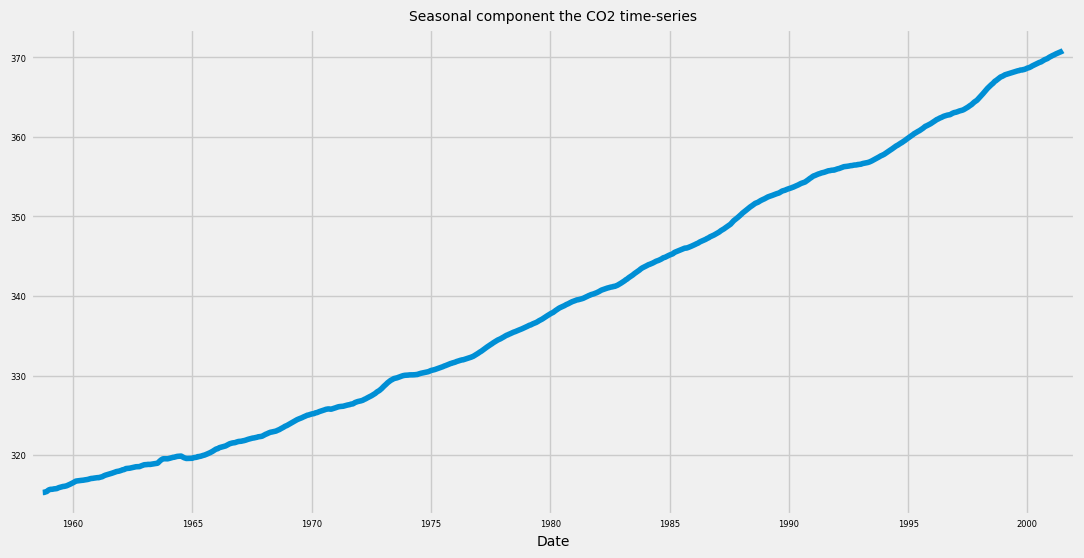

'\n\n'

In [26]:
# exercise 04

"""
Plot individual components

It is also possible to extract other inferred quantities from your time-series decomposition object. The following code shows you how to extract the observed, trend and noise (or residual, resid) components.

observed = decomposition.observed
trend = decomposition.trend
residuals = decomposition.resid

You can then use the extracted components and plot them individually.

The decomposition object you created in the last exercise is available in your workspace.
"""

# Instructions

"""

    Extract the trend component from the decomposition object.
    Plot this trend component.

"""

# solution

# Extract the trend component
trend = decomposition.trend

# Plot the values of the trend
ax = trend.plot(figsize=(12, 6), fontsize=6)

# Specify axis labels
ax.set_xlabel('Date', fontsize=10)
ax.set_title('Seasonal component the CO2 time-series', fontsize=10)
plt.show()

#----------------------------------#

# Conclusion

"""

"""

In [28]:
airline = pd.read_csv(path_data+'ch3_airline_passengers.csv', parse_dates=['Month'], index_col='Month')
airline.head()

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


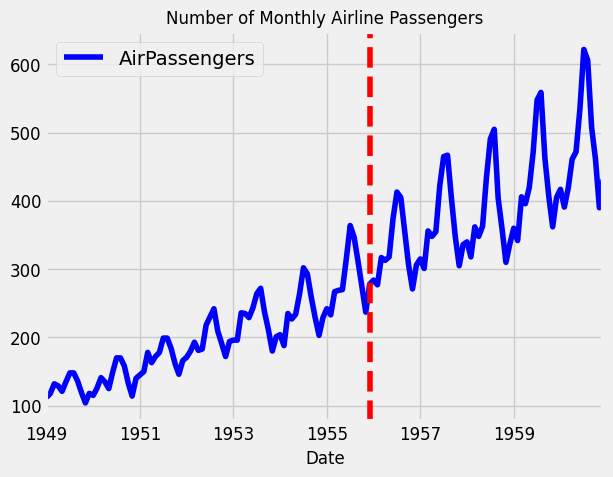

'\nNice! The number of airline passengers has risen a lot over time. Can you find any interesting patterns in this time series?\n'

In [29]:
# exercise 05

"""
Visualize the airline dataset

You will now review the contents of chapter 1. You will have the opportunity to work with a new dataset that contains the monthly number of passengers who took a commercial flight between January 1949 and December 1960.

We have printed the first 5 and the last 5 rows of the airline DataFrame for you to review.
"""

# Instructions

"""

    Plot the time series of airline using a "blue" line plot.
    Add a vertical line on this plot at December 1, 1955.
    Specify the x-axis label on your plot: 'Date'.
    Specify the title of your plot: 'Number of Monthly Airline Passengers'.

"""

# solution

# Plot the time series in your DataFrame
ax = airline.plot(color='blue', fontsize=12)

# Add a red vertical line at the date 1955-12-01
ax.axvline('1955-12-01', color='red', linestyle='--')

# Specify the labels in your plot
ax.set_xlabel('Date', fontsize=12)
ax.set_title('Number of Monthly Airline Passengers', fontsize=12)
plt.show()

#----------------------------------#

# Conclusion

"""
Nice! The number of airline passengers has risen a lot over time. Can you find any interesting patterns in this time series?
"""

AirPassengers    0
dtype: int64
       AirPassengers
count     144.000000
mean      280.298611
std       119.966317
min       104.000000
25%       180.000000
50%       265.500000
75%       360.500000
max       622.000000


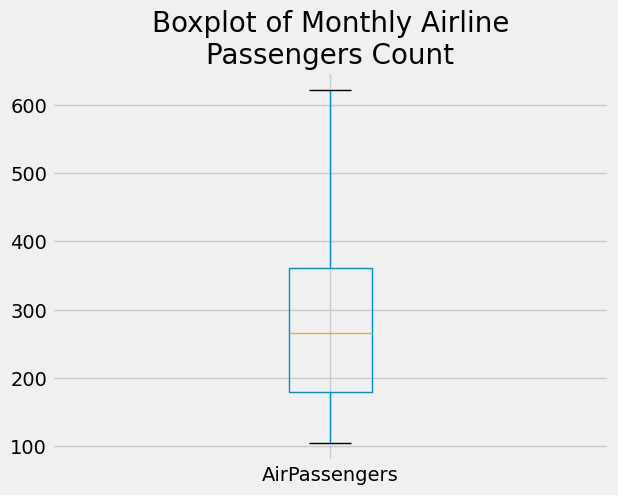

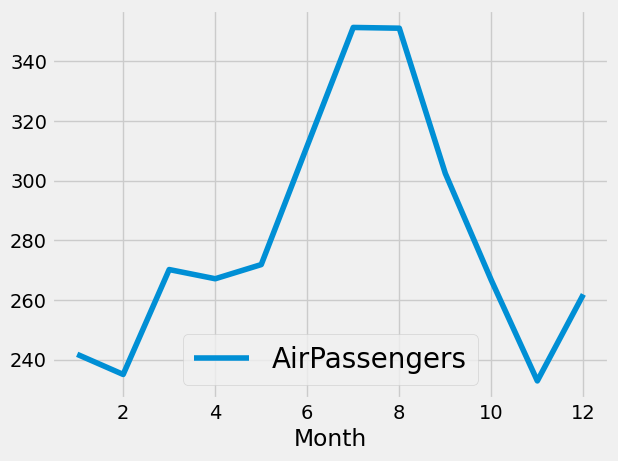

'\nExcellent! Looks like July and August are the busiest months!\n'

In [32]:
# exercise 06

"""
Analyze the airline dataset

In Chapter 2 you learned:

    How to check for the presence of missing values, and how to collect summary statistics of time series data contained in a pandas DataFrame.
    To generate boxplots of your data to quickly gain insight in your data.
    Display aggregate statistics of your data using groupby().

In this exercise, you will apply all these concepts on the airline DataFrame.
"""

# Instructions

"""

    Print the numbers of missing values in the airline DataFrame.
    Print the summary statistics of all the numeric columns in airline.
---
    Generate a boxplot of the monthly volume of airline passengers data.
---

    Extract the month from the index of airline.
    Compute the mean number of passengers per month in airline and assign it to mean_airline_by_month.
    Plot the mean number of passengers per month in airline.

"""

# solution

# Print out the number of missing values
print(airline.isna().sum())

# Print out summary statistics of the airline DataFrame
print(airline.describe())

#----------------------------------#

# Display boxplot of airline values
ax = airline.boxplot()

# Specify the title of your plot
ax.set_title('Boxplot of Monthly Airline\nPassengers Count', fontsize=20)
plt.show()

#----------------------------------#

# Get month for each dates from the index of airline
index_month = airline.index.month

# Compute the mean number of passengers for each month of the year
mean_airline_by_month = airline.groupby(index_month).mean()

# Plot the mean number of passengers for each month of the year
mean_airline_by_month.plot()
plt.legend(fontsize=20)
plt.show()

#----------------------------------#

# Conclusion

"""
Excellent! Looks like July and August are the busiest months!
"""

            Trend   Seasonal
Month                       
1949-01-01    NaN -24.748737
1949-02-01    NaN -36.188131
1949-03-01    NaN  -2.241162
1949-04-01    NaN  -8.036616
1949-05-01    NaN  -4.506313


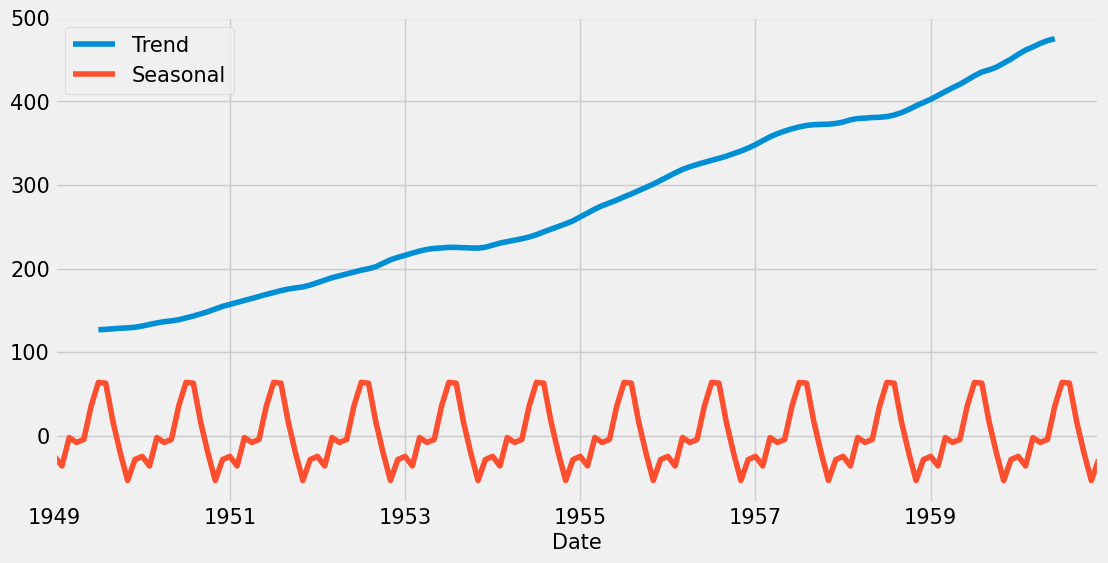

'\n\n'

In [60]:
# exercise 07

"""
Time series decomposition of the airline dataset

In this exercise, you will apply time series decomposition to the airline dataset, and visualize the trend and seasonal components.
"""

# Instructions

"""

    Import statsmodels.api using the alias sm.
    Perform time series decomposition on the airline DataFrame into a variable called decomposition.
    Extract the trend and seasonal components.
---
    We placed the trend and seasonal components in the airline_decomposed DataFrame.

    Print the first 5 rows of airline_decomposed.
    Plot these two components on the same graph.

"""

# solution

# Import statsmodels.api as sm
import statsmodels.api as sm

# Perform time series decompositon
decomposition = sm.tsa.seasonal_decompose(airline)

# Extract the trend and seasonal components
trend = decomposition.trend
seasonal = decomposition.seasonal

#----------------------------------#
airline_decomposed = pd.DataFrame({'Trend': trend, 'Seasonal': seasonal}, index=airline.index)
#----------------------------------#

# Print the first 5 rows of airline_decomposed
print(airline_decomposed.head())

# Plot the values of the airline_decomposed DataFrame
ax = airline_decomposed.plot(figsize=(12, 6), fontsize=15)

# Specify axis labels
ax.set_xlabel('Date', fontsize=15)
plt.legend(fontsize=15)
plt.show()

#----------------------------------#

# Conclusion

"""

"""